In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\\EmailSpamDetection\\spam_ham_dataset.csv")

In [4]:
data.iloc[0,2]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [8]:
data.shape

(5171, 4)

In [9]:
data['Unnamed: 0'].nunique() ## All are unique id's so delete them

5171

In [11]:
data.drop(columns=['Unnamed: 0'] , inplace = True)

In [13]:
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [19]:
data['label_num'].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

In [20]:
## So this is highly imbalanced data so balance the data 

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [35]:
ros = RandomOverSampler()

In [36]:
text_resampled , label_num_resampled = ros.fit_resample(data['text'].values.reshape(-1,1) , data['label_num'].values.reshape(-1,1))

In [48]:
resampled_data = pd.DataFrame(label_num_resampled ).reset_index().merge(how = 'inner' , on = 'index', right = pd.DataFrame(text_resampled).reset_index()).drop(columns = ['index']) 

In [55]:
resampled_data['label_num'] = resampled_data['0_x']
resampled_data['text'] = resampled_data['0_y']

In [58]:
resampled_data.drop(columns = ['0_x','0_y'] , inplace = True)

In [62]:
resampled_data['text'] = resampled_data['text'].apply(lambda x : x.split('Subject: ')[-1])

In [69]:
resampled_data.head()

,label_num,Subject
0,0,enron methanol ; meter # : 988291\r\nthis is a...
1,0,"hpl nom for january 9 , 2001\r\n( see attached..."
2,0,"neon retreat\r\nho ho ho , we ' re around to t..."
3,1,"photoshop , windows , office . cheap . main tr..."
4,0,re : indian springs\r\nthis deal is to book th...


In [65]:
resampled_data['Subject'] = resampled_data['text']

In [68]:
resampled_data.drop(columns=['text'] , inplace = True)

In [70]:
feature = resampled_data[['Subject']]

In [71]:
label = resampled_data['label_num']

In [74]:
feature.head()

,Subject
0,enron methanol ; meter # : 988291\r\nthis is a...
1,"hpl nom for january 9 , 2001\r\n( see attached..."
2,"neon retreat\r\nho ho ho , we ' re around to t..."
3,"photoshop , windows , office . cheap . main tr..."
4,re : indian springs\r\nthis deal is to book th...


In [75]:
## HTML Tags removal
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [77]:
feature['Subject'] = feature['Subject'].apply(remove_html_tags)

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_20608\597427043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['Subject'] = feature['Subject'].apply(remove_html_tags)


In [78]:
## url removal
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [80]:
feature['Subject'] = feature['Subject'].apply(remove_url)

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_20608\2100102368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['Subject'] = feature['Subject'].apply(remove_url)


In [83]:
import string,time
exclude = string.punctuation

In [84]:
## Punctuation Removal
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [93]:
feature['Subject'] = feature['Subject'].apply(remove_punc)

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_20608\3838991547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['Subject'] = feature['Subject'].apply(remove_punc)


In [87]:
whitespace_characters = string.whitespace
whitespace_character = []
for i in whitespace_characters:
    whitespace_character.append(repr(i))

In [91]:
def remove_whitespace(text):
    for char in whitespace_character:
        text = text.replace(char , '')
    return text

In [97]:
from nltk.corpus import stopwords

In [98]:
## Stop Words removal
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [100]:
feature['Subject'] = feature['Subject'].apply(remove_stopwords)

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_20608\895568592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['Subject'] = feature['Subject'].apply(remove_stopwords)


In [108]:
import nltk

In [ ]:
nltk.download('punkt')

In [114]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [124]:
from nltk.corpus import stopwords

In [117]:
feature['words_length'] = feature['Subject'].apply(lambda x : len(word_tokenize(x)))

In [121]:
feature['Sent_length'] = feature['Subject'].apply(lambda x : len(sent_tokenize(x)))

In [125]:
from nltk.stem.porter import PorterStemmer

In [126]:
import string
ps = PorterStemmer()

In [217]:
def preprocess(text):
    y = []
    for word in word_tokenize(text):
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(ps.stem(word))
    return ' '.join(y)
            

In [218]:
feature['transformed_text'] = feature['Subject'].apply(preprocess)

In [219]:
resampled_data['transformed_tet'] = feature['transformed_text']

In [220]:
resampled_data['words_length'] = feature['words_length']

In [221]:
resampled_data['sent_length'] = feature['Sent_length']

In [222]:
resampled_data.groupby('label_num')[['words_length' , 'sent_length']].describe()

words_length                                                  \
                 count        mean         std  min   25%   50%    75%   
label_num                                                                
0               3672.0  104.991558  148.289075  1.0  26.0  57.0  132.0   
1               3672.0  127.131536  198.309597  0.0  27.0  61.0  128.0   

                  sent_length                                               
              max       count      mean       std  min  25%  50%  75%  max  
label_num                                                                   
0          3474.0      3672.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
1          2591.0      3672.0  0.989107  0.103815  0.0  1.0  1.0  1.0  1.0

In [223]:
from wordcloud import WordCloud

In [224]:
spam_detail = resampled_data[resampled_data['label_num']==1]
ham_detail = resampled_data[resampled_data['label_num']==0]

In [225]:
spam_words = []
for i in spam_detail['transformed_tet'] :
    for j in word_tokenize(i):
        spam_words.append(j)

In [226]:
from collections import Counter

In [227]:
import matplotlib.pyplot as plt

In [228]:
wc = WordCloud(width=600 , height=600 , min_font_size=10)

In [229]:
spam_wc =  wc.generate(spam_detail['transformed_tet'].str.cat(sep = " "))

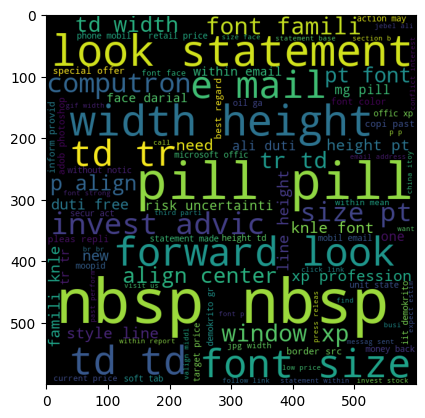

In [230]:
plt.imshow(spam_wc)

In [231]:
ham_wc = wc.generate(ham_detail['transformed_tet'].str.cat(sep=' '))

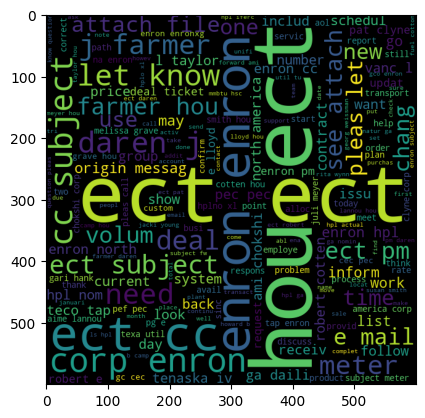

In [232]:
plt.imshow(ham_wc)

In [233]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [234]:
tfidf = TfidfVectorizer(max_features=5000)

In [235]:
x =  tfidf.fit_transform(resampled_data['transformed_tet']).toarray()

In [236]:
y = label

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8)

In [239]:
from sklearn.linear_model import LogisticRegression

In [240]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [242]:
from sklearn.metrics import accuracy_score , precision_score

In [243]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'GaussianNB' : GaussianNB(),
    'MultiNomialNB': MultinomialNB(),
    'BernoulliNB' : BernoulliNB(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'ExtraTreeClassifier': ExtraTreesClassifier()
}

In [244]:
accuracy_detail = {}
precission_detail = {}

In [245]:
for i in models :
    model = models[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_detail[i] = accuracy_score(y_test,y_pred)
    precission_detail[i] = precision_score(y_test , y_pred)

In [246]:
accuracy_detail

{'Logistic Regression': 0.9816201497617427,
 'GaussianNB': 0.9686861810755616,
 'MultiNomialNB': 0.9584751531654186,
 'BernoulliNB': 0.9203539823008849,
 'RandomForestClassifier': 0.988427501701838,
 'ExtraTreeClassifier': 0.9904697072838666}

In [247]:
precission_detail

{'Logistic Regression': 0.9647979139504563,
 'GaussianNB': 0.977961432506887,
 'MultiNomialNB': 0.94148244473342,
 'BernoulliNB': 0.9381153305203939,
 'RandomForestClassifier': 0.9788079470198675,
 'ExtraTreeClassifier': 0.9892183288409704}

In [248]:
import pickle

In [249]:
pickle.dump(models['ExtraTreeClassifier'],open('D:\Extra_spam' , 'wb'))

In [250]:
pickle.dump(tfidf , open('D:\Tfidf','wb'))

In [251]:
pickle.dump(preprocess , open('D:\preprocess' , 'wb'))

In [257]:
processing = pickle.load(open('D:\preprocess' , 'rb'))

In [253]:
Tfidf = pickle.load(open('D:\Tfidf' , 'rb'))

In [254]:
Extra_spam = pickle.load(open('D:\Extra_spam' , 'rb'))

In [255]:
spam_mail = 'Hey Hurry up you got an exiting price of 2,0000. send your bank details'

In [256]:
Extra_spam.predict(Tfidf.transform(pd.DataFrame({'spam':processing(spam_mail)} , index=[0])['spam']).toarray())

array([1], dtype=int64)

In [261]:
Tfidf.transform([preprocess(spam_mail)]).toarray()

array([[0.        , 0.        , 0.45307807, ..., 0.        , 0.        ,
        0.        ]])

In [264]:
resampled_data['transformed_tet'][0]

'enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [272]:
resampled_data

,label_num,Subject,transformed_tet,words_length,sent_length
0,0,enron methanol ; meter # : 988291\r\nthis is a...,enron methanol meter 988291 follow note gave m...,34,1
1,0,"hpl nom for january 9 , 2001\r\n( see attached...",hpl nom januari 9 2001 see attach file hplnol ...,14,1
2,0,"neon retreat\r\nho ho ho , we ' re around to t...",neon retreat ho ho ho around wonder time year ...,219,1
3,1,"photoshop , windows , office . cheap . main tr...",photoshop window offic cheap main trend abas d...,43,1
4,0,re : indian springs\r\nthis deal is to book th...,indian spring deal book teco pvr revenu unders...,28,1
...,...,...,...,...,...
7339,1,swjlmiqqt the fountain of youth\r\najuinbol ba...,swjlmiqqt fountain youth ajuinbol balzak fda a...,132,1
7340,1,"lagrangian\r\nchaney , !\r\n75 % off for all n...",lagrangian chaney 75 new softwar windowxp phot...,12,1
7341,1,economise 60 percents or much more with our re...,economis 60 percent much recip direct prescrip...,23,1
7342,1,women change your life\r\n,women chang life,3,1


In [271]:
spam_detail['transformed_tet'][3]

'photoshop window offic cheap main trend abas darer prudent fortuit undergon lightheart charm orinoco taster railroad affluent pornograph cuvier irvin parkhous blameworthi chlorophyl robe diagrammat fogarti clear bayda inconvenienc manag repres smart hashish academi sharehold unload bad danielson pure caffein spaniard chargeabl levin'